<a href="https://colab.research.google.com/github/HakureiKirisame/Foods-Nutrition-Analysis/blob/main/Project_Foods_%26_Nutrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Food and Nutrition 
-----------------------------------------------
**OPIM 5512: Data Science Using Python - University of Connecticut**

# Introduction (2.5 pts)

!['Food'](https://familydoctor.org/wp-content/uploads/2010/05/shutterstock_300553067-705x470.jpg)

This data is sourced from the United States Department of Agriculture’s Food Composition Database. The USDA Food and Nutrient Database for Dietary Studies 2017-2018 (FNDDS) converts food and beverages consumed in What We Eat In America, National Health and Nutrition Examination Survey into gram amounts and determines their nutrient values. 

It contains data for various types of food including the amounts of different vitamins and minerals found in the foods as well as macronutrient percentages. The food covered spans a large variety of items from butter to Campbell’s soup. The supplementary documenation for each field is derived directly from that pages’ Wikipedia article. 

We have 38 columns and Primary descriptions for 7,083 foods/beverages (6,286 foods/797 beverages) in this dataset. 

Team Members:

1. Harshit Kashyap
2. Rehana Hirani
3. Venkata Hariharan Togarati
4. Qiming Xue


**Project Purpose:**
We have analyzed the relationships between various Macro and Micronutrients by exploring the nutritional attributes of each food item. The motive of this project is to find their relationship with Cholestrol.

# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.utils import shuffle
from collections import Counter
import seaborn as sb

# Read Data from Website


In [ ]:
# read the data
# note how we can read from the website if we want to! you can also read from your google drive
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head(40)

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,0,0,0.177,1.03,60,0.036,1.8,6.89,0.014,87.50,1.658,0.497,2.009,4.38,32,0.052,0.03,3,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,0,0,0.110,3.34,58,0.137,1.9,4.89,0.057,89.04,0.426,0.065,1.164,1.99,126,0.001,0.00,12,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,0,0,0.105,3.28,31,0.138,1.9,4.81,0.056,88.10,0.688,0.108,1.860,3.20,123,0.001,0.00,12,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,0,0,0.043,3.10,28,0.105,2.0,4.46,0.020,88.20,0.999,0.128,2.154,3.46,101,0.010,0.05,5,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,0,0,0.105,3.28,31,0.138,1.9,4.81,0.056,88.10,0.688,0.108,1.860,3.20,123,0.001,0.00,12,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
5,Milk,"Milk, calcium fortified, low fat (1%)",11111160,0,1,0,5.19,5,17.4,0.0,0,0,0.113,3.38,58,0.140,2.1,4.96,0.057,89.70,0.210,0.032,0.568,0.95,126,0.001,0.00,12,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
6,Milk,"Milk, calcium fortified, fat free (skim)",11111170,0,0,0,4.85,2,16.0,0.0,0,0,0.088,3.40,137,0.140,2.1,4.85,0.036,90.80,0.047,0.007,0.117,0.18,204,0.011,0.04,11,101,166,52,0.40,137,0.38,0.040,1.0,0.01,0.0
7,Milk,"Milk, reduced fat (2%)",11112110,0,3,0,4.91,8,18.2,0.0,0,0,0.112,3.35,83,0.137,1.8,4.89,0.059,89.10,0.400,0.058,1.110,1.90,126,0.001,0.00,12,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2
8,Milk,"Milk, acidophilus, low fat (1%)",11112120,0,1,0,5.19,5,17.4,0.0,0,0,0.113,3.38,58,0.140,2.1,4.96,0.057,89.70,0.210,0.032,0.568,0.95,126,0.001,0.00,12,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
9,Milk,"Milk, acidophilus, reduced fat (2%)",11112130,0,3,0,4.91,8,18.2,0.0,0,0,0.112,3.35,83,0.137,1.8,4.89,0.059,89.10,0.400,0.058,1.110,1.90,126,0.001,0.00,12,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

# Random Sampling


In [ ]:
rd.seed(2110)
df=shuffle(df)                        #shuffle dataframe
df=df.sample(frac=0.9,replace=False) #sample 90% without replacement
df

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
5458,Potato,"Potato, french fries, with chili and cheese, f...",71401050,2,62,22,25.41,4,24.4,2.8,52,171,1.806,3.99,5,0.049,2.6,0.70,0.107,57.31,4.560,3.835,2.253,11.38,36,0.091,0.87,26,97,355,385,0.56,11,0.10,0.210,2.3,1.25,9.8
4885,Rice,"Rice, white, with peas and carrots, no added fat",58160500,466,1178,0,23.74,0,6.1,1.3,383,0,1.336,2.72,0,0.027,5.8,1.09,0.160,72.18,0.072,0.114,0.078,0.33,15,0.075,1.15,13,46,64,229,0.49,119,0.00,0.094,1.5,0.16,4.7
2454,Frankfurter or hot dog sandwich,"Frankfurter or hot dog sandwich, meat and poul...",27564182,0,4,0,22.78,46,35.8,2.7,3,0,3.483,11.18,30,0.164,21.8,4.23,0.218,46.78,6.157,3.951,4.867,16.16,150,0.130,1.68,42,194,307,756,1.42,30,0.44,0.115,11.2,0.44,2.0
4470,Pizza,"Pizza, cheese, with vegetables, from frozen, t...",58106300,2,93,0,26.51,12,13.4,2.1,55,1606,1.966,9.24,51,0.230,18.9,3.62,0.191,51.58,3.732,1.682,3.756,10.81,159,0.207,2.04,21,160,154,393,1.18,59,0.68,0.094,5.1,0.92,6.4
4676,Lo mein,"Lo mein, with beef",58136150,17,78,0,16.18,15,22.9,1.0,90,2,2.216,9.73,1,0.157,14.8,2.11,0.053,69.99,0.854,1.095,0.702,2.77,20,0.063,1.43,14,89,160,358,1.19,8,0.40,0.208,1.4,0.30,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,Pretzels,"Pretzels, hard, flavored, gluten free",54408082,0,0,0,77.69,0,2.9,3.3,0,0,0.229,3.48,0,0.003,2.2,4.17,0.015,6.83,2.791,1.030,3.403,7.58,0,0.051,0.46,7,21,68,1625,0.09,0,0.00,0.050,0.3,1.17,1.7
6159,Relish,"Relish, pickle",75503020,129,519,296,35.06,0,4.9,1.1,271,0,0.233,0.37,0,0.033,0.0,29.13,0.000,62.07,0.209,0.122,0.054,0.47,3,0.085,0.87,5,14,25,811,0.14,61,0.00,0.015,1.0,0.58,83.8
6632,Coffee,"Coffee, brewed, flavored",92101700,0,0,0,0.00,0,2.6,0.0,0,0,0.191,0.12,0,0.076,0.0,0.00,0.014,99.39,0.015,0.001,0.002,0.02,2,0.002,0.01,3,3,49,2,0.02,0,0.00,0.001,0.0,0.01,0.1
1727,Chicken with gravy,Chicken with gravy,27142000,0,0,0,1.58,80,47.3,0.0,0,0,5.380,18.88,6,0.143,16.8,0.09,0.056,72.98,2.193,0.775,1.291,5.21,13,0.050,0.54,17,171,207,526,1.14,6,0.25,0.180,0.0,0.32,0.2


# Missing Values


In [ ]:
#method 1
df.info()           #no missing values detected
#method 2
df.isnull().values.any()    #no missing values detected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 5458 to 1235
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                    

False

# Literature Review and Basic EDA



## Lit review 
**Citations**
1. "How to Calculate Net Carbs for Keto in 2 Simple Steps" (https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps)
2. "The World's Highest Cholesterol Foods" (https://healthyeating.sfgate.com/worlds-highest-cholesterol-foods-11145.html)
3. "Brain as food" ("https://en.wikipedia.org/wiki/Brain_as_food")
4. "Effect of Choline and Cholesterol on Lipoprotein
Patterns of Rats" ("https://www.ahajournals.org/doi/pdf/10.1161/01.RES.5.1.111")
5. "Too much selenium can increase your cholesterol" ("www.sciencedaily.com/releases/2009/11/091112103417.htm")
6. "Dietary protein effects on cholesterol and lipoprotein concentrations: a review" (*Journal of the American College of Nutrition vol. 5,6 (1986): 533-49.*)
7. "A Vitamin B12 Deficiency Could Be Linked to Poor Heart Health" ("https://www.bicycling.com/news/a33643777/vitamin-b12-deficiency-heart-health-study/#:~:text=They%20found%20that%20low%20levels,percentage%20have%20on%20the%20body.")
8. "Cholesterol Metabolism Is Affected by Calcium Phosphate Supplementation in Humans" ("https://academic.oup.com/jn/article/135/7/1678/4663905")
9. "Can Carbohydrates Raise Cholesterol?" ("https://healthyeating.sfgate.com/can-carbohydrates-raise-cholesterol-5983.html")
10. "Cholesterol: Top foods to improve your numbers" ("https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/cholesterol/art-20045192#:~:text=Soluble%20fiber%20can%20reduce%20the,to%204%20grams%20of%20fiber.")

### Food products with highest cholesterol

In [ ]:
df[df['Data.Cholesterol']==max(df['Data.Cholesterol'])] #find the food with highest cholesterol

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
1151,Brains,"Brains, cooked",25150000,0,69,0,1.47,3074,486.8,0.0,0,0,3.59,11.57,0,0.215,21.6,0.0,0.068,74.24,1.866,1.618,2.374,10.44,9,0.228,2.28,12,332,242,429,1.08,6,10.02,0.142,10.4,1.66,0.1


The cooked brain has the highes cholesterol, as described by Sara Ipatenco, a 3-ounce serving of cow brain contains a staggering 1,696 milligrams of cholesterol [2]. And we can also observe the other aspect of the brain to see which factors are higher than average.

In [ ]:
pd.set_option('display.max_columns', None)                          #show all columns
df[df['Data.Cholesterol']==max(df['Data.Cholesterol'])]>df.mean()  #to check if the avg values are higher than mean of the whole dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,Category,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Water,Description,Nutrient Data Bank Number
1151,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,True,True,True,False,True,True,False,True,True,False,False,False,True,False,True,True,False,True,False,False


We can see that the `choline, selenium, protein, sodium, potassium, phosphorus, iron, copper, lipid, niacin, vitamin B12, vitamin C, vitamin E and water` are higher than average, because the brain is made up of DHA and lipid [3]. And for foods with high cholesterol (higher than average):

In [ ]:
High_Cholesterol=df[df['Data.Cholesterol']>df['Data.Cholesterol'].mean()]>df.mean()
High_Cholesterol.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,Category,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Data.Water,Description,Nutrient Data Bank Number
count,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951,1951
unique,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
top,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,True,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False
freq,1951,1907,1857,1718,1583,1951,1621,1211,1111,1077,1221,1787,1743,1771,1357,1671,1438,1430,1492,1088,1496,988,1076,1592,1291,1053,1539,1713,1343,1392,1015,1079,1785,1342,1716,977,1951,1552


We can see that among 1943 types of food with high cholesterol, 1619 of them are high in `choline`; 1576 of them are high in `protein`, 1565 of them are high in `selenium`; and 1850 of them are low in `carotene`; 1782 of them are low in `fiber`; 1733 of them are low in `lutein and zeaxanthin`; 1708 of them are low in total `sugar`.

### Correlation of Cholesterol

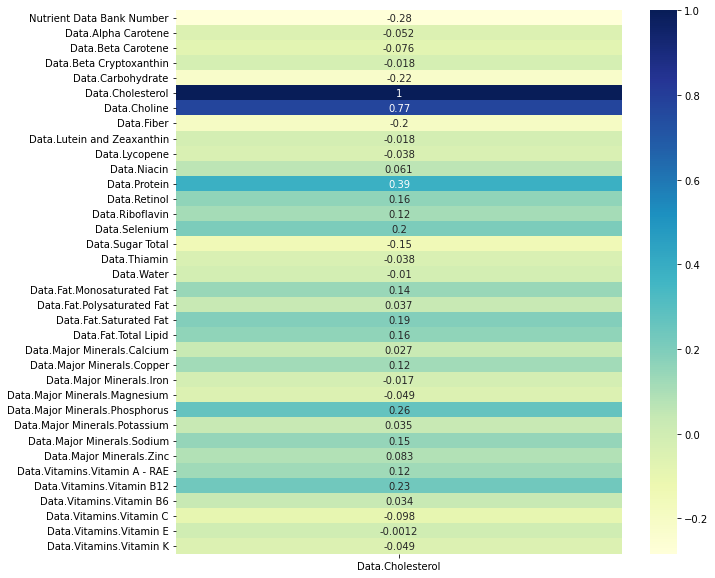

In [ ]:
Cho_Cor=df.corr()[['Data.Cholesterol']]     #show correlation with cholesterol
plt.figure(figsize=(10,10))
sb.heatmap(Cho_Cor,annot=True,cmap='YlGnBu')

We can observe that `choline` has a high positive correlation with cholesterol, and `protein` and `selenium` have a moderate positive correlation. And none of the facts have a noticible negative correlation with cholesterol. 

As proposed by George F. Wilgram, `choline` supplementation elevates the serum cholesterol significantly. thus they have a high correlation [4]. And Dr. Saverio also mentions that high levels of `selenium` are associated with increased cholesterol [5]. While the relationship between `protein` and cholesterol is hard to be identified. As W. A. Forsythe asserted, the mechanism responsible for the effects of different proteins on plasma cholesterol concentrations has not been established [6]. Thus without knowing the exact type of the protein, no further conclusion can be made.

Apart from the facts that are obviously correlated with cholesterol, some facts are less obvious correlated but still noticible within its group. The `vitamin B12` has a relatively high correlation compared with other vitamins, since low levels of vitamin B12 were associated with higher levels of total cholesterol, LDL (bad) cholesterol [7].

And among all the major minerals, `phosphorus` has a relatively high correlation with cholesterol. The reason has been explained by Bianka Ditscheid, that dietary calcium and phosphate precipitate in the small intestine to form insoluble amorphous calcium phosphate (ACP). The ability of ACP to bind and inactivate luminal bile acids might have an effect on cholesterol metabolism [8].

Among those negatively correlated facts, `carbonhydrate` and `fiber` are relatively high. As suggested by Jill Corleone, different types of carbonhydrate have different effect on the cholesterol level, some might lower it and some might raise it. [9] And the relation between fiber and cholesterol is clear that 5 to 10 grams or more of soluble fiber a day decreases your LDL cholesterol [10].



## Unique values from `Category`

In [ ]:
df['Category'].nunique()                                               #2258 unique values in the Category
Freq_Table=df.groupby(['Category'])['Category'].count()                #create frequency table
print(Freq_Table.head())                                                #display data
print(Freq_Table.sort_values(ascending=False))                           #sort in descending order

Category
100 GRAND Bar                       1
3 Musketeers Truffle Crisp Bar      1
Abalone                             3
Adobo                               1
Air filled fritter or fried puff    1
Name: Category, dtype: int64
Category
Infant formula          159
Rice                    130
Bread                   105
Potato                   95
Cookie                   88
                       ... 
Fish curry with rice      1
Fish curry                1
Fish chowder              1
Fish cake or patty        1
Zwieback toast            1
Name: Category, Length: 2261, dtype: int64


[]

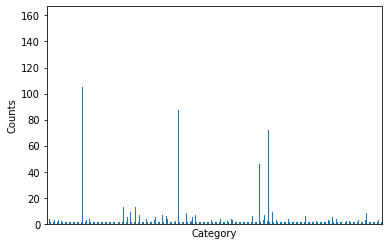

In [ ]:
fig,ax=plt.subplots()                                                #create empty plot
Freq_Table.plot(ax=ax,kind='bar',xlabel='Category',ylabel='Counts')   #add content to the table
ax.set_xticks([])                                                      #delete xticks

## Correlation 


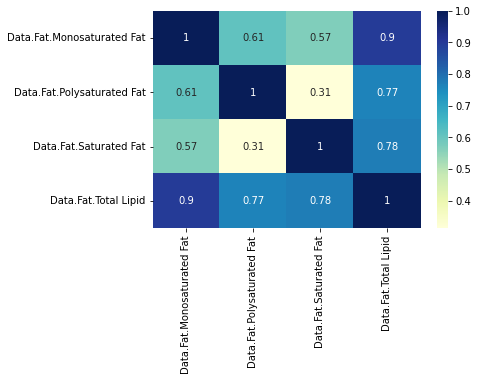

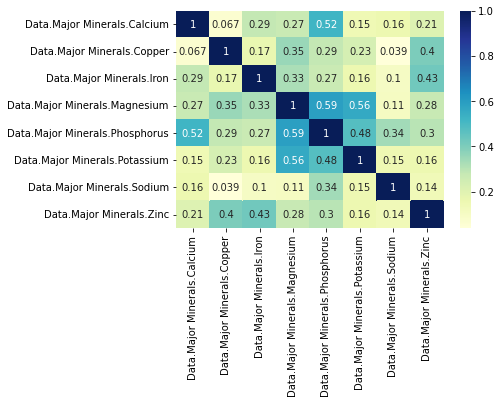

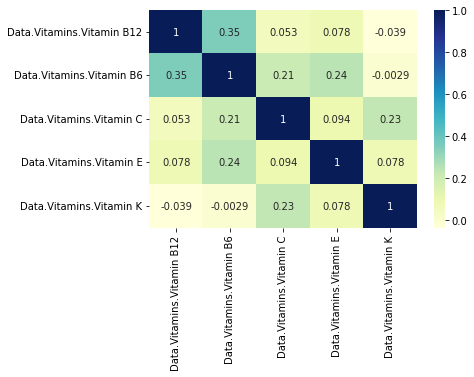

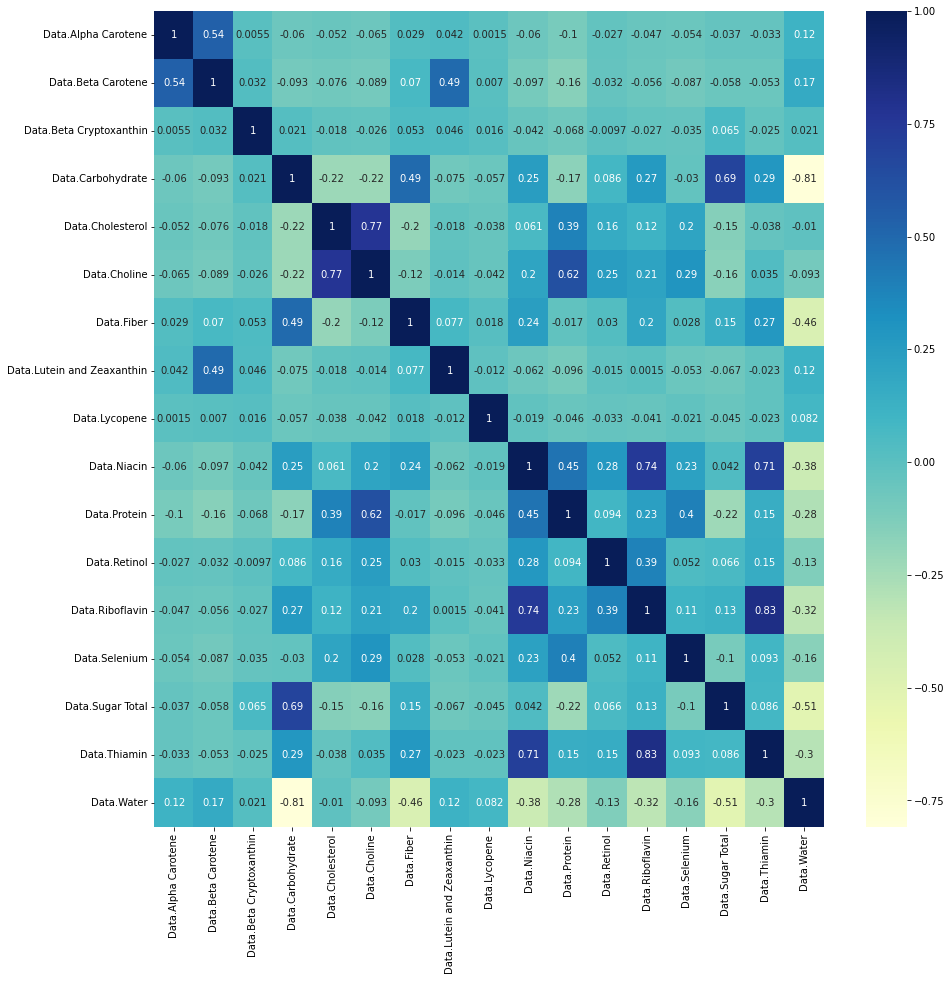

In [ ]:
#cor1
Cor=df.corr()                                     #correlation of the dataset
#cor2
Cor_Fat=df[['Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat','Data.Fat.Saturated Fat','Data.Fat.Total Lipid']].corr()
                                                     #correlation of the fat
plt.figure()                                          #heat map of fat correlation
sb.heatmap(Cor_Fat,annot=True,cmap='YlGnBu')
#Cor3
Cor_Mineral=df.iloc[:,24:32].corr()                  #correlation of minerals
                                                   #heat map of mineral correlation
plt.figure()
sb.heatmap(Cor_Mineral,annot=True,cmap='YlGnBu')
#Cor4
Cor_Vit=df.iloc[:,33:39].corr()                  #correlation of vitamins
                                                 #heat map of vitamins
plt.figure()
sb.heatmap(Cor_Vit,annot=True,cmap='YlGnBu')
#Cor5
Cor_Other=df.iloc[:,3:20].corr()                #correlation of all other facts

plt.figure(figsize=(15,15))                     #heat map of all other fact correlation
sb.heatmap(Cor_Other,annot=True,cmap='YlGnBu')

## Feature Engineering: Net Carbs


In [ ]:
#Total Carbon - Dietary Fiber:
NetCarbs=df['Data.Carbohydrate']-df['Data.Fiber']             #formula of NetCarb
NetCarbs=pd.DataFrame(NetCarbs,columns=['NetCarbs'])
NetCarbs.reset_index(drop=True,inplace=True)
df.reset_index(drop=True,inplace=True)
df=pd.concat([df,NetCarbs],axis=1)                            #merge df and NetCarbs
df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
0,Potato,"Potato, french fries, with chili and cheese, f...",71401050,2,62,22,25.41,4,24.4,2.8,52,171,1.806,3.99,5,0.049,2.6,0.70,0.107,57.31,4.560,3.835,2.253,11.38,36,0.091,0.87,26,97,355,385,0.56,11,0.10,0.210,2.3,1.25,9.8,22.61
1,Rice,"Rice, white, with peas and carrots, no added fat",58160500,466,1178,0,23.74,0,6.1,1.3,383,0,1.336,2.72,0,0.027,5.8,1.09,0.160,72.18,0.072,0.114,0.078,0.33,15,0.075,1.15,13,46,64,229,0.49,119,0.00,0.094,1.5,0.16,4.7,22.44
2,Frankfurter or hot dog sandwich,"Frankfurter or hot dog sandwich, meat and poul...",27564182,0,4,0,22.78,46,35.8,2.7,3,0,3.483,11.18,30,0.164,21.8,4.23,0.218,46.78,6.157,3.951,4.867,16.16,150,0.130,1.68,42,194,307,756,1.42,30,0.44,0.115,11.2,0.44,2.0,20.08
3,Pizza,"Pizza, cheese, with vegetables, from frozen, t...",58106300,2,93,0,26.51,12,13.4,2.1,55,1606,1.966,9.24,51,0.230,18.9,3.62,0.191,51.58,3.732,1.682,3.756,10.81,159,0.207,2.04,21,160,154,393,1.18,59,0.68,0.094,5.1,0.92,6.4,24.41
4,Lo mein,"Lo mein, with beef",58136150,17,78,0,16.18,15,22.9,1.0,90,2,2.216,9.73,1,0.157,14.8,2.11,0.053,69.99,0.854,1.095,0.702,2.77,20,0.063,1.43,14,89,160,358,1.19,8,0.40,0.208,1.4,0.30,10.6,15.18


Text(0, 0.5, 'Cholesterol')

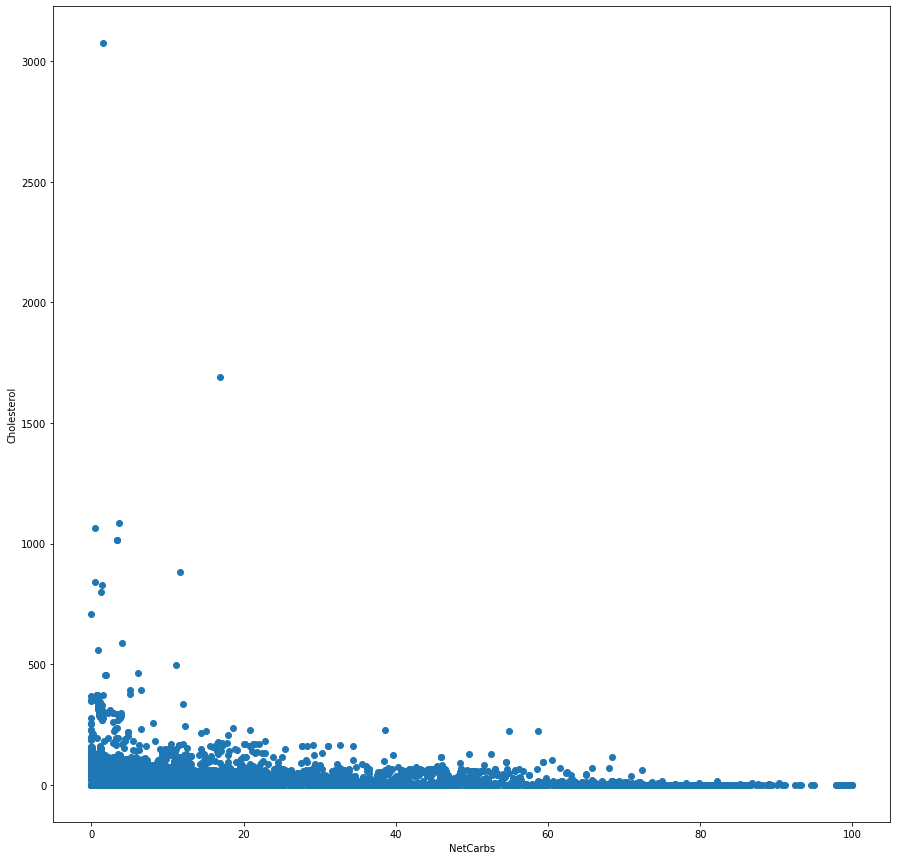

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(df['NetCarbs'],df['Data.Cholesterol'])          #scatter plot to find trend between two features
plt.xlabel('NetCarbs')
plt.ylabel('Cholesterol')

In [ ]:
#food categories with lowest NetCarbs
MinNetCarb=df[df['NetCarbs']==min(df['NetCarbs'])]
#food categories with highest NetCarbs
MaxNetCarb=df[df['NetCarbs']==max(df['NetCarbs'])]

# Advanced EDA 

## Item 1: Scatter plot
 Let's find the relation between Protein and Cholesterol


**Caption:** Cholesterol Vs Protein

In [ ]:
df.columns

Index(['Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',
       'Data.Vitamins.Vitamin E', 'Data.Vitamins.

Text(0.5, 1.0, 'Protein vs Cholesterol')

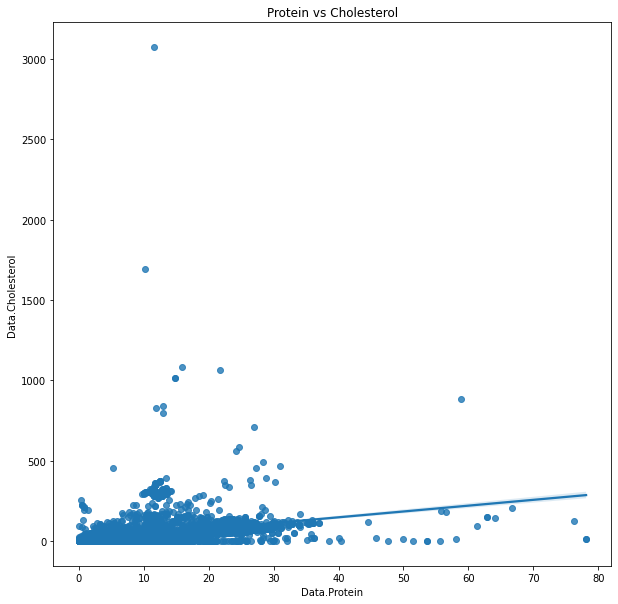

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.regplot(y = df['Data.Cholesterol'], x =df['Data.Protein'], data=df)         #scatter plot to find trend between Protein vs Cholesterol
plt.title("Protein vs Cholesterol")

### The above graph shows somwaht linear trend between protein and cholesterol

## Item 2:Table 1
Let's find the Protien in categories

**Caption**: Top 10 protien containing categories

In [ ]:
df['Category'].nunique()

2261

In [ ]:
temp_df  = df.groupby(['Category'],as_index=False).agg({"Data.Protein":"mean","Data.Carbohydrate":"mean"}).sort_values('Data.Protein', ascending = False)[:10]
temp_df

,Category,Data.Protein,Data.Carbohydrate
1368,Nutritional powder mix (EAS Whey Protein Powder),66.670,17.950
1566,Pork skin rinds,61.300,0.000
1369,Nutritional powder mix (Isopure),58.140,29.070
2022,Textured vegetable protein,51.460,33.920
1367,Nutritional powder mix (EAS Soy Protein Powder),47.620,43.940
1365,Nutritional powder mix,46.066,33.527
1371,Nutritional powder mix (Muscle Milk),45.710,18.500
2245,Yeast,40.440,41.220
1848,Soy nuts,38.550,30.220
2179,Venison/deer ribs,36.080,0.000


### Top 5 food category with high protein are Pork skin rinds, Nutritional powder mix, Textured vegetable protein, EAS Soy Protein powder and Muscle milk with protein quantity 61.3gm, 58.14gm,51.46gm, 47.62gm and 45.71gm  respectively

## Item 3: Bar plot
Let's find the food that is rich in fiber

**Caption**: Visualizing top 10 foods with high fiber

In [ ]:
import plotly.express as px
Fiber= df.sort_values(by='Data.Fiber', ascending= False)
top_10_fibers=Fiber.head(10)
fig = px.bar(top_10_fibers, x='Description', y='Data.Fiber' , color='Data.Fiber',title=' Top 10 Fiber rich foods')
fig.show()

### Wheat bran, unprocessed, cocoa powder (not reconstituted) and Cereal (Kellogg's all-bran) are the foods with high fiber

## Item 4: Table 2
Let's find the highest vitamin resources
**Caption**: Vitamin rich foods

In [ ]:
Vitamins= df[['Description','Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',
       'Data.Vitamins.Vitamin E', 'Data.Vitamins.Vitamin K']]
Vitamin_A = Vitamins[Vitamins["Data.Vitamins.Vitamin A - RAE"]==Vitamins["Data.Vitamins.Vitamin A - RAE"].max()]
# MAX() function gives us the food that has the highest Vitamin A 
print(Vitamin_A[["Description","Data.Vitamins.Vitamin A - RAE"]])   
print("--------------------------------")

Vitamin_B12 = Vitamins[Vitamins["Data.Vitamins.Vitamin B12"]==Vitamins["Data.Vitamins.Vitamin B12"].max()]
# MAX() function gives us the food that has the highest Vitamin B12
print(Vitamin_B12[["Description","Data.Vitamins.Vitamin B12"]])
print("--------------------------------")

Vitamin_B6 = Vitamins[Vitamins["Data.Vitamins.Vitamin B6"]==Vitamins["Data.Vitamins.Vitamin B6"].max()]
# MAX() function gives us the food that has the highest Vitamin B6
print(Vitamin_B6[["Description","Data.Vitamins.Vitamin B6"]])
print("--------------------------------")

Vitamin_C = Vitamins[Vitamins["Data.Vitamins.Vitamin C"]==Vitamins["Data.Vitamins.Vitamin C"].max()]
# MAX() function gives us the food that has the highest Vitamin C
print(Vitamin_C[["Description","Data.Vitamins.Vitamin C"]])
print("--------------------------------")

Vitamin_E = Vitamins[Vitamins["Data.Vitamins.Vitamin E"]==Vitamins["Data.Vitamins.Vitamin E"].max()]
# MAX() function gives us the food that has the highest Vitamin E
print(Vitamin_E[["Description","Data.Vitamins.Vitamin E"]])
print("--------------------------------")

Vitamin_K = Vitamins[Vitamins["Data.Vitamins.Vitamin K"]==Vitamins["Data.Vitamins.Vitamin K"].max()]
# MAX() function gives us the food that has the highest Vitamin K
print(Vitamin_K[["Description","Data.Vitamins.Vitamin K"]])


              Description  Data.Vitamins.Vitamin A - RAE
4238  Beef liver, braised                           9363
--------------------------------
            Description  Data.Vitamins.Vitamin B12
2208  Beef liver, fried                      82.44
--------------------------------
                     Description  Data.Vitamins.Vitamin B6
982  Cereal (Kellogg's All-Bran)                      12.0
--------------------------------
                                            Description  \
2481  Fruit flavored drink, powdered, not reconstitu...   

      Data.Vitamins.Vitamin C  
2481                    560.0  
--------------------------------
        Description  Data.Vitamins.Vitamin E
538  Wheat germ oil                    149.4
--------------------------------
       Description  Data.Vitamins.Vitamin K
5805  Parsley, raw                   1640.0


### Vitamin A is rich in **Beef liver, braised**
### Vitamin B12 is rich in **Octopus, dried**
### Vitamin B6 is rich in **Cereal (Kellogg's All-Bran)**
### Vitamin C is rich in **Yogurt covered fruit snacks candy rolls**
### Vitamin E is rich in **Wheat germ oil**
### Vitamin K is rich in **Parsley, raw**

#Item 5: Minerals rich food categories

In [ ]:
tmp = df
tmp['Total.Minerals'] = (tmp['Data.Major Minerals.Calcium']+ tmp['Data.Major Minerals.Copper']+ tmp['Data.Major Minerals.Iron']+ tmp['Data.Major Minerals.Magnesium']
                          + tmp['Data.Major Minerals.Phosphorus']+ tmp['Data.Major Minerals.Potassium']+ tmp['Data.Major Minerals.Sodium']+ tmp['Data.Major Minerals.Zinc'])

#creating a new colum keeping values of total minerals in categories

tmp = tmp.iloc[: , [0,39]].sort_values(by='Total.Minerals', ascending= False) #display top rich in minerals food

tmp.head(10) #top 10 in the list

,Category,Total.Minerals
5859,Fish,9732.266
4628,Fish sauce,8365.030
4384,Tea,6745.500
1327,Fish moochim,6678.504
6317,Black bean sauce,6352.054
4983,Yeast extract spread,5839.475
1377,Whey,5065.920
6055,Nutritional powder mix,4900.750
2235,Nutritional powder mix,4900.750
4824,Anchovy,4772.409


###It is clear from our output that Fish is high in Minerals. From our domain knowledge, it is a great source of minerals, such as iron, zinc, iodine, magnesium, and potassium. The American Heart Association recommends eating fish at least two times per week as part of a healthy diet.

# Data Splitting 
Use an 80/10/10 split for train, test and validation.

In [ ]:
# Separating Target Variable
Y = df['Data.Cholesterol']
print(Y.shape)

(6375,)


In [ ]:
X= df.drop('Data.Cholesterol',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 10)


X_test_1, X_Val, y_test_1, y_Val = train_test_split(X_test,y_test, test_size = 0.5, shuffle = True, random_state = 10)


In [ ]:
x_copy = X_train.copy(deep=True)

y_copy = y_train.copy(deep=True)

In [ ]:
# Creating training independent variables
X_train = X_train.drop(columns=['Category','Description','Nutrient Data Bank Number'], axis=1)
X_test_1  = X_test_1.drop(columns=['Category','Description','Nutrient Data Bank Number'], axis=1)
X_Val = X_Val.drop(columns=['Category','Description','Nutrient Data Bank Number'], axis=1)

In [ ]:
# to_numpy() converts dataframe to numpy array

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_test_1 = X_test_1.to_numpy()
X_Val = X_Val.to_numpy()
y_test_1 = y_test_1.to_numpy()
y_Val = y_Val.to_numpy()


# Modeling (Regression) 


## Model 1

In [ ]:
# Model 1 - BASIC Linear Regression
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

# We need to train the model before predicting
model1.fit(X_train,y_train)
  

# storing the predictions for test data in y_pred_val and y_pred_test variable
y_pred_val_1 = model1.predict(X_Val)


y_pred_test_1 = model1.predict(X_test_1)

y_pred_train_1 = model1.predict(X_train)

In [ ]:
x_train_copy = pd.DataFrame(x_copy)
y_train_copy = pd.DataFrame(y_copy)
y_pred_copy  = pd.DataFrame(y_pred_train_1)

In [ ]:
y_pred_copy.columns = ['Predictions']
y_train_copy.columns = ['Actual']

In [ ]:
print(x_train_copy.shape)
print(y_train_copy.shape)
print(y_pred_copy.shape)

(5100, 39)
(5100, 1)
(5100, 1)


In [ ]:
# Since we used shuffler, we have to reset index in order to have correct concatenation

x_train_copy = x_train_copy.reset_index()
y_train_copy = y_train_copy.reset_index()

In [ ]:
x_train_copy = x_train_copy.drop(['index'],axis=1)
y_train_copy = y_train_copy.drop(['index'],axis=1)

In [ ]:
# Keeping only a few columns for the x_train data
x_train_copy = x_train_copy[["Category","Description"]]

In [ ]:
advanced_analysis_model_1 = pd.concat([x_train_copy,y_train_copy,y_pred_copy],axis=1)

In [ ]:
advanced_analysis_model_1.shape

(5100, 4)

In [ ]:
advanced_analysis_model_1.head()

,Category,Description,Actual,Predictions
0,Soft drink,"Soft drink, cola",0,-0.701980
1,Thousand Island dressing,"Thousand Island dressing, fat free",5,-5.571008
2,Whiskey and diet cola,Whiskey and diet cola,0,-1.337985
3,Milk,"Milk, dry, not reconstituted, fat free (skim)",20,108.761322
4,Chicken in soy-based sauce,"Chicken in soy-based sauce, rice and vegetable...",16,6.889286


In [ ]:
# To calculate mean absolute error, we should import metrics library
from sklearn import metrics

In [ ]:
# Mean Absolute Error
print('Validation - Mean Absolute Error:', metrics.mean_absolute_error(y_Val, y_pred_val_1))

print('Test - Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred_test_1))

print('Train - Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_1))

# Mean Squared Error


print('Validation - Mean Squared Error:', metrics.mean_squared_error(y_Val, y_pred_val_1))

print('Test - Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_test_1))

print('Train - Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_1))
# Rsquare

print("Validation - R2",metrics.r2_score(y_Val, y_pred_val_1))
print("Test - R2",metrics.r2_score(y_test_1, y_pred_test_1))
print('Train - R2', metrics.r2_score(y_train, y_pred_train_1))

# 
# Median Absolute Error


print('Validation - Median Absolute Error:', metrics.median_absolute_error(y_Val, y_pred_val_1))

print('Test - Median Absolute Error:', metrics.median_absolute_error(y_test_1, y_pred_test_1))

print('Train - Median Absolute Error:', metrics.median_absolute_error(y_train, y_pred_train_1))

Validation - Mean Absolute Error: 16.740279906453264
Test - Mean Absolute Error: 16.227773389903444
Train - Mean Absolute Error: 16.589408261157356
Validation - Mean Squared Error: 952.4321456797161
Test - Mean Squared Error: 1046.1715516692318
Train - Mean Squared Error: 2319.917951205259
Validation - R2 0.6842408153032165
Test - R2 0.63088951051599
Train - R2 0.6606672286416075
Validation - Median Absolute Error: 9.034767863419347
Test - Median Absolute Error: 8.045743292399862
Train - Median Absolute Error: 8.48101760265044


<Figure size 432x288 with 0 Axes>

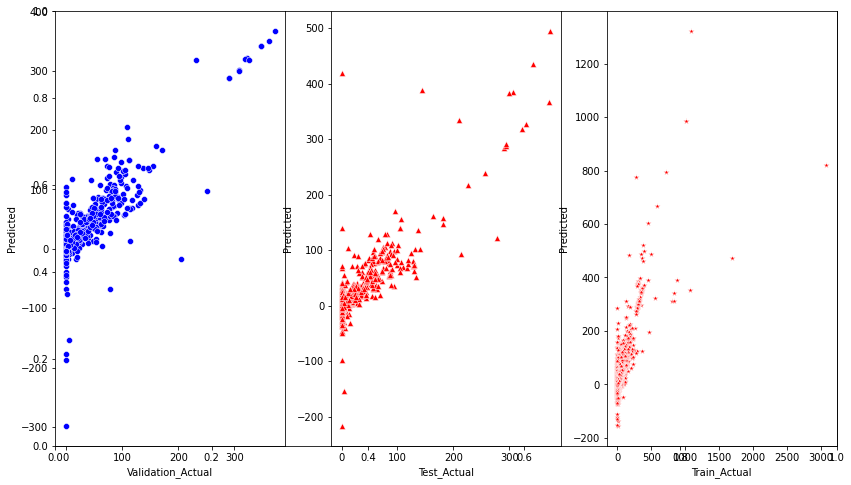

In [ ]:
# Creating as separate dataframe containing actual values and predicted values

df_1 = pd.DataFrame({'Test_Actual': y_test_1.flatten(), 'Predicted': y_pred_test_1.flatten()})


# Creating as separate dataframe containing actual values and predicted values
df_2 = pd.DataFrame({'Validation_Actual': y_Val.flatten(), 'Predicted': y_pred_val_1.flatten()})

df_3 = pd.DataFrame({'Train_Actual': y_train.flatten(), 'Predicted': y_pred_train_1.flatten()})
# importing matplotlib to get a scatter plot. Asssigning apt lables and title.
import matplotlib.pyplot as plt


fig = plt.figure()
# Set figsize here
fig, axes = plt.subplots(figsize=(14,8))
# 121 - is a way of locating your subplot in the overall space of the figure object. The code 121 can be though of as 1 row, 2 columns, 1st position
ax1= fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.scatterplot(ax= ax1,data=df_2,x="Validation_Actual", y="Predicted",color = 'b')
sns.scatterplot(ax= ax2,data=df_1,x="Test_Actual", y="Predicted",color = 'r',marker='^')
sns.scatterplot(ax= ax3,data=df_3,x="Train_Actual", y="Predicted",color = 'r',marker='*')



## Model 2

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Scaling the dataframes using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # import the scaler
X_train = scaler.fit_transform(X_train) # learn and apply to train (from train)
X_Val = scaler.transform(X_Val) # simply TRANSFORM/APPLY to the test data (no leakage!)
X_test_1 = scaler.transform(X_test_1)

model_2 = DecisionTreeRegressor()
model_2.fit(X_train,y_train)

# storing the predictions for test data in y_pred_val and y_pred_test variable
y_pred_val_2 = model_2.predict(X_Val)


y_pred_test_2 = model_2.predict(X_test_1)

y_pred_train_2 = model_2.predict(X_train)

In [ ]:
# Preparing Data for Adavanced analysis
x_train_copy = pd.DataFrame(x_copy)
y_train_copy = pd.DataFrame(y_copy)
y_pred_copy  = pd.DataFrame(y_pred_train_2)

In [ ]:
y_pred_copy.columns = ['Predictions']
y_train_copy.columns = ['Actual']

In [ ]:
print(x_train_copy.shape)
print(y_train_copy.shape)
print(y_pred_copy.shape)

(5100, 39)
(5100, 1)
(5100, 1)


In [ ]:
# The index is shuffled. So, we need to rset index and drop the actual index for better concatenation
x_train_copy = x_train_copy.reset_index()
y_train_copy = y_train_copy.reset_index()

In [ ]:
x_train_copy = x_train_copy.drop(['index'],axis=1)
y_train_copy = y_train_copy.drop(['index'],axis=1)

In [ ]:
# Keeping only a few columns for the x_train data
x_train_copy = x_train_copy[["Category","Description"]]

In [ ]:
# This is the final data for Advanced analysis
advanced_analysis_model_2 = pd.concat([x_train_copy,y_train_copy,y_pred_copy],axis=1)

In [ ]:
advanced_analysis_model_2.shape

(5100, 4)

In [ ]:
# Mean Absolute Error
print('Validation - Mean Absolute Error:', metrics.mean_absolute_error(y_Val, y_pred_val_2))

print('Test - Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred_test_2))

print('Train - Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_2))

# Mean Squared Error


print('Validation - Mean Squared Error:', metrics.mean_squared_error(y_Val, y_pred_val_2))

print('Test - Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_test_2))

print('Train - Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_2))
# Rsquare

print("Validation - R2",metrics.r2_score(y_Val, y_pred_val_2))
print("Test - R2",metrics.r2_score(y_test_1, y_pred_test_2))
print('Train - R2', metrics.r2_score(y_train, y_pred_train_2))

# 
# Median Absolute Error


print('Validation - Median Absolute Error:', metrics.median_absolute_error(y_Val, y_pred_val_2))

print('Test - Median Absolute Error:', metrics.median_absolute_error(y_test_1, y_pred_test_2))

print('Train - Median Absolute Error:', metrics.median_absolute_error(y_train, y_pred_train_2))

Validation - Mean Absolute Error: 5.114420062695925
Test - Mean Absolute Error: 8.442700156985872
Train - Mean Absolute Error: 0.0
Validation - Mean Squared Error: 215.56583072100312
Test - Mean Squared Error: 1941.7080062794348
Train - Mean Squared Error: 0.0
Validation - R2 0.928533606025685
Test - R2 0.31492613091105714
Train - R2 1.0
Validation - Median Absolute Error: 0.0
Test - Median Absolute Error: 0.0
Train - Median Absolute Error: 0.0


<Figure size 432x288 with 0 Axes>

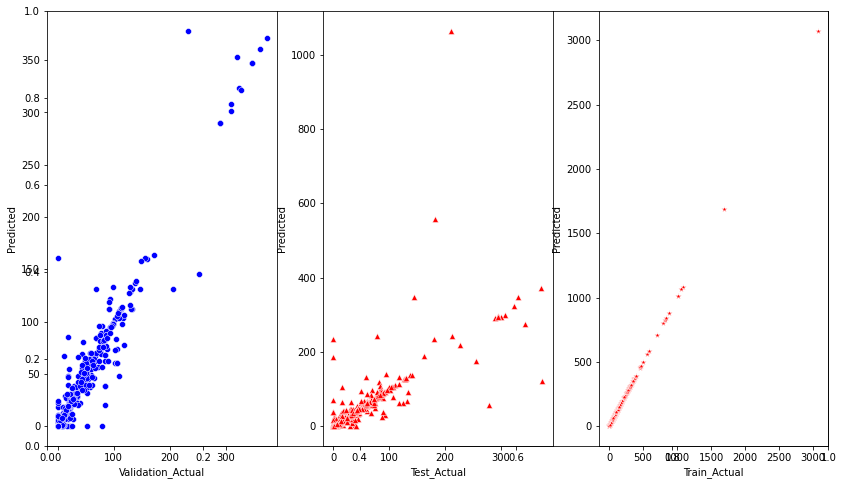

In [ ]:
# Creating as separate dataframe containing actual values and predicted values

df_1 = pd.DataFrame({'Test_Actual': y_test_1.flatten(), 'Predicted': y_pred_test_2.flatten()})


# Creating as separate dataframe containing actual values and predicted values
df_2 = pd.DataFrame({'Validation_Actual': y_Val.flatten(), 'Predicted': y_pred_val_2.flatten()})

df_3 = pd.DataFrame({'Train_Actual': y_train.flatten(), 'Predicted': y_pred_train_2.flatten()})
# importing matplotlib to get a scatter plot. Asssigning apt lables and title.
import matplotlib.pyplot as plt


fig = plt.figure()
# Set figsize here
fig, axes = plt.subplots(figsize=(14,8))
# 121 - is a way of locating your subplot in the overall space of the figure object. The code 121 can be though of as 1 row, 2 columns, 1st position
ax1= fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.scatterplot(ax= ax1,data=df_2,x="Validation_Actual", y="Predicted",color = 'b')
sns.scatterplot(ax= ax2,data=df_1,x="Test_Actual", y="Predicted",color = 'r',marker='^')
sns.scatterplot(ax= ax3,data=df_3,x="Train_Actual", y="Predicted",color = 'r',marker='*')



## Model 3

In [ ]:
df_copy = df.copy(deep=True)
df_copy = df_copy[df_copy["Data.Cholesterol"]!=0]



In [ ]:
df_copy.shape

(4180, 40)

In [ ]:
# Separating Target Variable
Y = df_copy['Data.Cholesterol']
print(Y.shape)

(4180,)


In [ ]:
# Creating training independent variables
X = df_copy.drop(columns=['Data.Cholesterol','Category','Description','Nutrient Data Bank Number'], axis=1)
print(X.shape)

(4180, 36)


In [ ]:
# to_numpy() converts dataframe to numpy array
X = X.to_numpy()
Y= Y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 10)


X_test_1, X_Val, y_test_1, y_Val = train_test_split(X_test,y_test, test_size = 0.5, shuffle = True, random_state = 10)


In [ ]:
# Model 3 - BASIC Linear Regression

model3 = LinearRegression()

# We need to train the model before predicting
model3.fit(X_train,y_train)


# storing the predictions for test data in y_pred_val and y_pred_test variable
y_pred_val_3 = model3.predict(X_Val)


y_pred_test_3 = model3.predict(X_test_1)

y_pred_train_3 = model3.predict(X_train)

In [ ]:
# Mean Absolute Error
print('Validation - Mean Absolute Error:', metrics.mean_absolute_error(y_Val, y_pred_val_3))

print('Test - Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred_test_3))

print('Train - Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_3))

# Mean Squared Error


print('Validation - Mean Squared Error:', metrics.mean_squared_error(y_Val, y_pred_val_3))

print('Test - Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_test_3))

print('Train - Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_3))
# Rsquare

print("Validation - R2",metrics.r2_score(y_Val, y_pred_val_3))
print("Test - R2",metrics.r2_score(y_test_1, y_pred_test_3))
print('Train - R2', metrics.r2_score(y_train, y_pred_train_3))

# 
# Median Absolute Error


print('Validation - Median Absolute Error:', metrics.median_absolute_error(y_Val, y_pred_val_3))

print('Test - Median Absolute Error:', metrics.median_absolute_error(y_test_1, y_pred_test_3))

print('Train - Median Absolute Error:', metrics.median_absolute_error(y_train, y_pred_train_3))

Validation - Mean Absolute Error: 17.61073896800913
Test - Mean Absolute Error: 21.348967306206283
Train - Mean Absolute Error: 17.76383184730941
Validation - Mean Squared Error: 1422.5563797849609
Test - Mean Squared Error: 4939.435922398037
Train - Mean Squared Error: 2605.8360983551215
Validation - R2 0.7021140663918916
Test - R2 0.6371726327995066
Train - R2 0.6768206192218006
Validation - Median Absolute Error: 9.383929504861783
Test - Median Absolute Error: 11.24442056518643
Train - Median Absolute Error: 9.695821001518937


<Figure size 432x288 with 0 Axes>

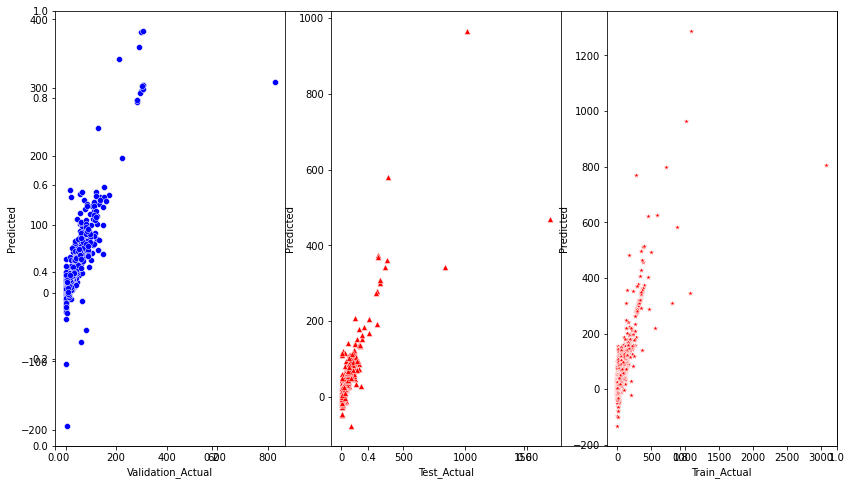

In [ ]:
# Creating as separate dataframe containing actual values and predicted values

df_1 = pd.DataFrame({'Test_Actual': y_test_1.flatten(), 'Predicted': y_pred_test_3.flatten()})


# Creating as separate dataframe containing actual values and predicted values
df_2 = pd.DataFrame({'Validation_Actual': y_Val.flatten(), 'Predicted': y_pred_val_3.flatten()})

df_3 = pd.DataFrame({'Train_Actual': y_train.flatten(), 'Predicted': y_pred_train_3.flatten()})
# importing matplotlib to get a scatter plot. Asssigning apt lables and title.
import matplotlib.pyplot as plt


fig = plt.figure()
# Set figsize here
fig, axes = plt.subplots(figsize=(14,8))
# 121 - is a way of locating your subplot in the overall space of the figure object. The code 121 can be though of as 1 row, 2 columns, 1st position
ax1= fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.scatterplot(ax= ax1,data=df_2,x="Validation_Actual", y="Predicted",color = 'b')
sns.scatterplot(ax= ax2,data=df_1,x="Test_Actual", y="Predicted",color = 'r',marker='^')
sns.scatterplot(ax= ax3,data=df_3,x="Train_Actual", y="Predicted",color = 'r',marker='*')



## Model 4

In [ ]:
# Scaling the dataframes using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # import the scaler
X_train = scaler.fit_transform(X_train) # learn and apply to train (from train)
X_Val = scaler.transform(X_Val) # simply TRANSFORM/APPLY to the test data (no leakage!)
X_test_1 = scaler.transform(X_test_1)

model_4 = DecisionTreeRegressor()
model_4.fit(X_train,y_train)

# storing the predictions for test data in y_pred_val and y_pred_test variable
y_pred_val_4 = model_4.predict(X_Val)


y_pred_test_4 = model_4.predict(X_test_1)

y_pred_train_4 = model_4.predict(X_train)

In [ ]:
# Mean Absolute Error
print('Validation - Mean Absolute Error:', metrics.mean_absolute_error(y_Val, y_pred_val_4))

print('Test - Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred_test_4))

print('Train - Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_4))

# Mean Squared Error


print('Validation - Mean Squared Error:', metrics.mean_squared_error(y_Val, y_pred_val_4))

print('Test - Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_test_4))

print('Train - Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_4))
# Rsquare

print("Validation - R2",metrics.r2_score(y_Val, y_pred_val_4))
print("Test - R2",metrics.r2_score(y_test_1, y_pred_test_4))
print('Train - R2', metrics.r2_score(y_train, y_pred_train_4))

# 
# Median Absolute Error


print('Validation - Median Absolute Error:', metrics.median_absolute_error(y_Val, y_pred_val_4))

print('Test - Median Absolute Error:', metrics.median_absolute_error(y_test_1, y_pred_test_4))

print('Train - Median Absolute Error:', metrics.median_absolute_error(y_train, y_pred_train_4))

Validation - Mean Absolute Error: 6.287081339712919
Test - Mean Absolute Error: 12.787081339712918
Train - Mean Absolute Error: 0.0
Validation - Mean Squared Error: 170.0334928229665
Test - Mean Squared Error: 4609.007177033493
Train - Mean Squared Error: 0.0
Validation - R2 0.964394672524773
Test - R2 0.6614443499776446
Train - R2 1.0
Validation - Median Absolute Error: 2.0
Test - Median Absolute Error: 2.0
Train - Median Absolute Error: 0.0


<Figure size 432x288 with 0 Axes>

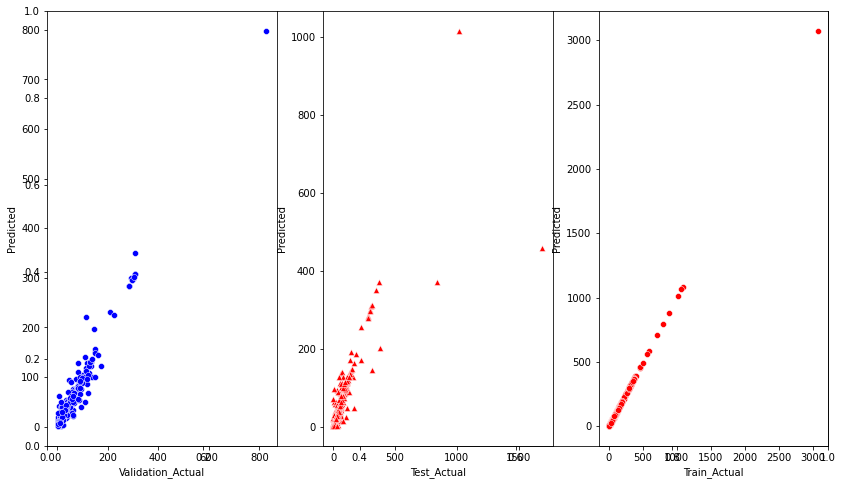

In [ ]:
# Creating as separate dataframe containing actual values and predicted values

df_1 = pd.DataFrame({'Test_Actual': y_test_1.flatten(), 'Predicted': y_pred_test_4.flatten()})


# Creating as separate dataframe containing actual values and predicted values
df_2 = pd.DataFrame({'Validation_Actual': y_Val.flatten(), 'Predicted': y_pred_val_4.flatten()})

df_3 = pd.DataFrame({'Train_Actual': y_train.flatten(), 'Predicted': y_pred_train_4.flatten()})
# importing matplotlib to get a scatter plot. Asssigning apt lables and title.
import matplotlib.pyplot as plt


fig = plt.figure()
# Set figsize here
fig, axes = plt.subplots(figsize=(14,8))
# 121 - is a way of locating your subplot in the overall space of the figure object. The code 121 can be though of as 1 row, 2 columns, 1st position
ax1= fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.scatterplot(ax= ax1,data=df_2,x="Validation_Actual", y="Predicted",color = 'b')
sns.scatterplot(ax= ax2,data=df_1,x="Test_Actual", y="Predicted",color = 'r',marker='^')
sns.scatterplot(ax= ax3,data=df_3,x="Train_Actual", y="Predicted",color = 'r')



# Analyze and interpret regression errors 


In [ ]:
# Let us now analyze our predictions from Model no.1

advanced_analysis_model_1.head()

,Category,Description,Actual,Predictions
0,Soft drink,"Soft drink, cola",0,-0.701980
1,Thousand Island dressing,"Thousand Island dressing, fat free",5,-5.571008
2,Whiskey and diet cola,Whiskey and diet cola,0,-1.337985
3,Milk,"Milk, dry, not reconstituted, fat free (skim)",20,108.761322
4,Chicken in soy-based sauce,"Chicken in soy-based sauce, rice and vegetable...",16,6.889286


### Food categories or items does the model have the most trouble predicting

In [ ]:
advanced_analysis_model_1['ABSOLUTE_ERROR'] = (advanced_analysis_model_1['Actual'] - advanced_analysis_model_1['Predictions']).abs()

In [ ]:
# Calculating mean absolute error for each category

Trouble_in_predicting = advanced_analysis_model_1.groupby('Category',as_index=False).agg({'ABSOLUTE_ERROR':'mean'}).sort_values('ABSOLUTE_ERROR',ascending=False).head()

In [ ]:
Trouble_in_predicting

,Category,ABSOLUTE_ERROR
189,Brains,2252.891718
195,Breaded brains,1217.813484
833,Goat head,712.483451
665,Duck egg,515.766263
518,Chitterlings,502.136968


#### We can conclude that Brains Category has the highest Mean absolute error and our model failed in predicting accurately for this category. That is followed by Goat head, Duck egg, Quail egg and Goose egg Categories.

### Food categories or item the model make a negative prediction for

In [ ]:
Negatively_predicted = advanced_analysis_model_1[advanced_analysis_model_1['Predictions']<0]

In [ ]:
Negatively_predicted['Category'].unique()

array(['Soft drink', 'Thousand Island dressing', 'Whiskey and diet cola',
       'Zombie', 'Egg white', 'Iced Coffee',
       'Fruit and vegetable smoothie', 'Apricot', 'Celery', 'Cookie',
       'Cereal (General Mills Cheerios Protein)', 'Turnip greens',
       'Jelly sandwich', 'Potato', 'Blackberries', 'Tea', 'Fennel bulb',
       'Pears and pineapple', 'Crackers', 'Soup',
       'Fruit juice and water drink', 'Potato tots', 'Watercress', 'Plum',
       'Vegetable stew without meat', 'Cake', 'Syrup', 'Egg white omelet',
       'Pupusa', 'Bread', 'Simple syrup', 'Fruit salad', 'Rice', 'Cereal',
       'Jelly', 'Plantain', 'Dutch apple dessert', 'Peach cobbler',
       'Nutritional powder mix (Muscle Milk)', 'Rusty Nail', 'Oatmeal',
       'Coffee creamer', 'Oatmeal with applesauce and bananas',
       'Black beans and brown rice',
       'Cereal (General Mills Cheerios Chocolate)',
       "Cereal (Quaker Cap'n Crunch's Peanut Butter Crunch)",
       'Cereal (General Mills Cocoa Puffs

In [ ]:
Negatively_predicted['Category'].nunique()

558

There are more than 500 categories whose cholesterol is predicted negative

# Modeling (Classification) 


#Model 1

In [ ]:
df_c=df.copy()

In [ ]:
df_c['target']=np.where(df['Data.Cholesterol']>df['Data.Cholesterol'].median(),1,0)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression 

In [ ]:
Y=df_c['target']
X = df_c.drop(['target','Category','Description','Nutrient Data Bank Number'],axis=1)
print(X.shape)
print(Y.shape)

(6375, 37)
(6375,)


In [ ]:
# to_numpy() converts dataframe to numpy array
X = X.to_numpy()
Y= Y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 10)


X_test_1, X_Val, y_test_1, y_Val = train_test_split(X_test,y_test, test_size = 0.5, shuffle = True, random_state = 10)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5100, 37) (1275, 37) (5100,) (1275,)


In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test_1 = np.array(X_test_1)
y_train = np.array(y_train)
y_test_1 = np.array(y_test_1)
X_Val=np.array(X_Val)
y_Val=np.array(y_Val)

In [ ]:
# make a variable to store the general model
LR = LogisticRegression() # use logistic for a classification problem
# fit the model 
LR = LR.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# store the predictions
train_preds_lg = LR.predict(X_train) # same shape as Y_train
test_preds_lg = LR.predict(X_test_1)  # same shape as Y_test
val_preds_lg = LR.predict(X_Val)

In [ ]:
test_preds_lg.shape

(637,)

#Model 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler() # import the scaler
X_train = scaler.fit_transform(X_train) # learn and apply to train (from train)
X_Val = scaler.transform(X_Val) # simply TRANSFORM/APPLY to the test data (no leakage!)
X_test_1 = scaler.transform(X_test_1)


model_2 = RandomForestClassifier()
model_2.fit(X_train,y_train)

# storing the predictions for test data in y_pred_val and y_pred_test variable
y_pred_val_2 = model_2.predict(X_Val)


y_pred_test_2 = model_2.predict(X_test_1)

y_pred_train_2 = model_2.predict(X_train)

# Analyze and interpret classification errors 


#Analyze model Model 1

In [ ]:
from sklearn.metrics import confusion_matrix
trainResults = classification_report(y_train, train_preds_lg) # (actual, predicted)
print(trainResults)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2569
           1       0.98      0.97      0.98      2531

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



In [ ]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_train, train_preds_lg).ravel()
print("positive class data points were correctly classified by the model:", tp)#true positive
print("negative class data points were correctly classified by the model:", tn)#True negative
print("negative class data points were incorrectly classified as belonging to the positive class by the model:", fp)#False positive
print("positive class data points were incorrectly classified as belonging to the negative class by the model:", fn)#False negative

positive class data points were correctly classified by the model: 2450
negative class data points were correctly classified by the model: 2525
negative class data points were incorrectly classified as belonging to the positive class by the model: 44
positive class data points were incorrectly classified as belonging to the negative class by the model: 81


Model is correctly predicting more 1s than 0s. It can be used by nutritionist as it is predicting more cholestrol level above the mean value than below and incorrect prediction of false positives is also less relatively.

In [ ]:
# precision and recall for '1' class
# these were defined above
myPrecision = tp / (tp + fp)
myRecall = tp / (tp + fn)

# round to 2 decimal points
myPrecision = round(myPrecision, 2)
myRecall = round(myRecall, 2)

# print
print("Precision: {}%".format(myPrecision*100))
print("Recall: {}%".format(myRecall*100))

Precision: 92.0%
Recall: 80.0%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print('Train MAPE:', mae(y_train, train_preds_lg))

Train MAPE: 0.13137254901960785


In [ ]:
train_preds_lg.shape

(5100,)

In [ ]:
# test results
testResults = classification_report(y_test, test_preds_lg)
# print
print(testResults)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       659
           1       0.94      0.79      0.86       616

    accuracy                           0.88      1275
   macro avg       0.89      0.87      0.87      1275
weighted avg       0.88      0.88      0.88      1275



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_lg).ravel()
print("positive class data points were correctly classified by the model:", tp)#true positive
print("negative class data points were correctly classified by the model:", tn)#True negative
print("negative class data points were incorrectly classified as belonging to the positive class by the model:", fp)#False positive
print("positive class data points were incorrectly classified as belonging to the negative class by the model:", fn)#False negative

positive class data points were correctly classified by the model: 488
negative class data points were correctly classified by the model: 629
negative class data points were incorrectly classified as belonging to the positive class by the model: 30
positive class data points were incorrectly classified as belonging to the negative class by the model: 128


In [ ]:
# precision and recall for '1' class
# these were defined above
myPrecision = tp / (tp + fp)
myRecall = tp / (tp + fn)

# round to 2 decimal points
myPrecision = round(myPrecision, 2)
myRecall = round(myRecall, 2)

# print
print("Precision: {}%".format(myPrecision*100))
print("Recall: {}%".format(myRecall*100))

Precision: 94.0%
Recall: 79.0%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print('MAE: ', mae(y_test, test_preds_lg))#mae

MAE:  0.12392156862745098


In [ ]:
#Validation result
ValResults = classification_report(y_Val, val_preds_lg)
# print
print(testResults)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       659
           1       0.94      0.79      0.86       616

    accuracy                           0.88      1275
   macro avg       0.89      0.87      0.87      1275
weighted avg       0.88      0.88      0.88      1275



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_Val, val_preds_lg).ravel()
print("positive class data points were correctly classified by the model:", tp)#true positive
print("negative class data points were correctly classified by the model:", tn)#True negative
print("negative class data points were incorrectly classified as belonging to the positive class by the model:", fp)#False positive
print("positive class data points were incorrectly classified as belonging to the negative class by the model:", fn)#False negative

positive class data points were correctly classified by the model: 250
negative class data points were correctly classified by the model: 321
negative class data points were incorrectly classified as belonging to the positive class by the model: 15
positive class data points were incorrectly classified as belonging to the negative class by the model: 52


In [ ]:
# precision and recall for '1' class
# these were defined above
myPrecision = tp / (tp + fp)
myRecall = tp / (tp + fn)

# round to 2 decimal points
myPrecision = round(myPrecision, 2)
myRecall = round(myRecall, 2)

# print
# print
print("Precision: {}%".format(myPrecision*100))
print("Recall: {}%".format(myRecall*100))

Precision: 94.0%
Recall: 83.0%


In [ ]:
print('Validation MAPE:', mae(y_Val, val_preds_lg))#mae

Validation MAPE: 0.10501567398119123


#Analyze model 2

In [ ]:
trainResults = classification_report(y_train, train_preds_lg) # (actual, predicted)
print(trainResults)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3548
           1       0.94      0.76      0.84      1552

    accuracy                           0.91      5100
   macro avg       0.92      0.87      0.89      5100
weighted avg       0.91      0.91      0.91      5100



In [ ]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_train, train_preds_lg).ravel()
print("positive class data points were correctly classified by the model:", tp)#true positive
print("negative class data points were correctly classified by the model:", tn)#True negative
print("negative class data points were incorrectly classified as belonging to the positive class by the model:", fp)#False positive
print("positive class data points were incorrectly classified as belonging to the negative class by the model:", fn)#False negative

positive class data points were correctly classified by the model: 2027
negative class data points were correctly classified by the model: 2403
negative class data points were incorrectly classified as belonging to the positive class by the model: 166
positive class data points were incorrectly classified as belonging to the negative class by the model: 504


In [ ]:
# precision and recall for '1' class
# these were defined above
myPrecision = tp / (tp + fp)
myRecall = tp / (tp + fn)

# round to 2 decimal points
myPrecision = round(myPrecision, 2)
myRecall = round(myRecall, 2)

# print
print("Precision: {}%".format(myPrecision*100))
print("Recall: {}%".format(myRecall*100))

Precision: 92.0%
Recall: 80.0%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print('Train MAPE:', mae(y_train, train_preds_lg))#mae

Train MAPE: 0.0892156862745098


In [ ]:
#test
testResults = classification_report(y_test, test_preds_lg)
# print
print(testResults)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       887
           1       0.94      0.72      0.81       388

    accuracy                           0.90      1275
   macro avg       0.91      0.85      0.87      1275
weighted avg       0.90      0.90      0.90      1275



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_lg).ravel()
print("positive class data points were correctly classified by the model:", tp)#true positive
print("negative class data points were correctly classified by the model:", tn)#True negative
print("negative class data points were incorrectly classified as belonging to the positive class by the model:", fp)#False positive
print("positive class data points were incorrectly classified as belonging to the negative class by the model:", fn)#False negative

positive class data points were correctly classified by the model: 278
negative class data points were correctly classified by the model: 869
negative class data points were incorrectly classified as belonging to the positive class by the model: 18
positive class data points were incorrectly classified as belonging to the negative class by the model: 110


In [ ]:
# precision and recall for '1' class
# these were defined above
myPrecision = tp / (tp + fp)
myRecall = tp / (tp + fn)

# round to 2 decimal points
myPrecision = round(myPrecision, 2)
myRecall = round(myRecall, 2)

# print
print("Precision: {}%".format(myPrecision*100))
print("Recall: {}%".format(myRecall*100))

Precision: 94.0%
Recall: 72.0%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae #import
print('MAE: ', mae(y_test, y_pred_test_2))#mae

MAE:  0.0


In [ ]:
#Validation result
ValResults = classification_report(y_Val, val_preds_lg)
#print
print(testResults)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       887
           1       0.94      0.72      0.81       388

    accuracy                           0.90      1275
   macro avg       0.91      0.85      0.87      1275
weighted avg       0.90      0.90      0.90      1275



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_Val, val_preds_lg).ravel()
print("positive class data points were correctly classified by the model:", tp)#true positive
print("negative class data points were correctly classified by the model:", tn)#True negative
print("negative class data points were incorrectly classified as belonging to the positive class by the model:", fp)#False positive
print("positive class data points were incorrectly classified as belonging to the negative class by the model:", fn)#False negative

positive class data points were correctly classified by the model: 136
negative class data points were correctly classified by the model: 437
negative class data points were incorrectly classified as belonging to the positive class by the model: 6
positive class data points were incorrectly classified as belonging to the negative class by the model: 59


# Conclusion 

We were able to establish the relationship of cholesterol with other nutrients. By performing a prilimary analysis of the database and EDA, we were able to match our findings with the help of litrature review. It is clear from the correlation matrix that the cholestrol had clear relationship with fats and fats with lipids. Minerals seemed to be independent of each other.

By calculating a new feature called NetCarbs, we were able to identify its relationship with cholesterol. We were also able to find foods that had the lowest net carbs and the foods have the highest net carbs. We noticed that it was higher in Sugar related product categories. 

We used data to predict the values of cholesterol and the impact of other variables on cholesterol by creating a classification model which would classify a food item to be high in cholesterol or low using logistic regression. 

Considering too many variables leads to inaccurate results. Running models with different samples improved our accuracy. In future, this analysis can be utilized to automate diet plans and by health concious folks. The models can label a food item with a scan - considering the nutrients present to be labeled as healthy or unhealthy. This can inturn be used to understand the consumption of various types of food depending on their nutrition values using the ingredients as an input and help people to lead a healthy lifestyle!


# Group Member Efforts
Here's a list group members, what they did, and the percentage that each team member contributed. We had trouble dividing work for this project since the division happened before all team members were in the group, and we aim to change that weightage in the next project!

* Qiming Xue: completed the below accounting to - 33%
1. Module import
2. Read data from website
3. Random sampling
4. Missing value
5. Literature Review and Basic EDA

* Venkata Hariharan Togarati: completed the below accounting to - 30%
1. the Advanced EDA 4 items 
2. Data Splitting 
3. Modelling building (2 models) Model 1 and 2
4. Analyze and Inrterpret Regression errors

* Harshit Kashyap: completed the below accounting to - 15%
1. Classification Model 
2. Analyzing Classification Model

* Rehana Hirani: completed the below accounting to - 22%
1. Introduction 2.5
2. Conclusion 2.5
3. Model 3 & 4 (Regression) 5
4. Classification Model - 2 5
5. Model 3 & 4 Analyzing Regression Errors 5
6. EDA (Item 5) 2
7. Adding comments, formatting and beautifying as necessary